# Librerias

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

from scipy.special import hermite
from scipy.special import eval_hermite
from scipy.optimize import curve_fit
from scipy.signal import find_peaks

# Cargamos los datos con el primer potenciometro

In [3]:
def dar_numero(string):
    numero = ''
    for letra in string:
        try:
            float(letra)
            numero += letra
        except:
            pass
    return float(numero)



In [4]:
ruta = 'Mediciones potencia'
archivos = os.listdir(ruta)

files = []
for archivo in archivos:
    if archivo[-4:] == '.txt':
        files.append(archivo)

W_files, I_files = [], []
for file in files[3:]: #--> El primer archivo corresponde a la segunda medicion
    # Guardado de la corriente
    amp = dar_numero(file)
    I_files.append(amp) #A

    # Cargamos los archivos
    df = pd.read_csv(ruta + f'/{file}', sep=" ", header=None)
    wats = df[2][2:] #--> todos los valores

    # Guardamos los valores
    wats_str = np.array([ float(wat[1] + '.' + wat[3:-5]) for wat in wats]) #--> No tengo en cuenta la potencia
    pot_wat = np.array([ float(wat[-3]) for wat in wats])

    W_files.append(wats_str * 10**(-pot_wat)) #W


## Sacamos valores medios y std

In [5]:
I, err_I, W, err_W = [], [], [], []
for i, w in zip(I_files, W_files):
    I.append(np.mean(i)), err_I.append(np.std(i))
    W.append(np.mean(w)), err_W.append(np.std(w))

# Mediciones de potencia sin la cavidad

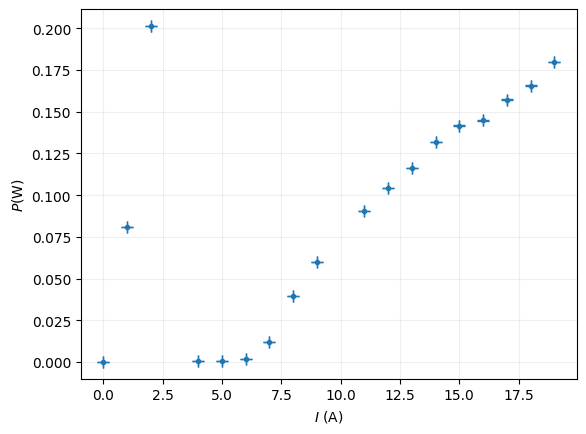

In [6]:
plt.figure()
plt.errorbar(I, W, yerr = err_W, xerr = err_I, fmt = '.', capsize = 4)

plt.xlabel(r'$I$ (A)'), plt.ylabel(r'$P$(W)')

plt.grid(alpha = 0.2)
plt.show()

In [7]:
pot = [0, 0, 0.1e-3, 0.1e-3, 0.2e-3, 0.5e-3, 0.9e-3, 6e-3, 18e-3, 27.0e-3, 31.3e-3, 37.0e-3, 42.9e-3, 44.8e-3, 53.7e-3, 64.3e-3, 74.6e-3, 83.7e-3, 94.6e-3, 105.6e-3, 117.2e-3, 128.6e-3, 141.6e-3, 153.7e-3] #W
a = [0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2, 2.1, 2.2, 2.3] #A
len(a), len(pot)
pd.DataFrame({'I (A)': a, 'P (W)': pot}).to_csv('Mediciones potencia/Datos_potencia_1064_luz_apagada_sin-lasear.csv', index=False)

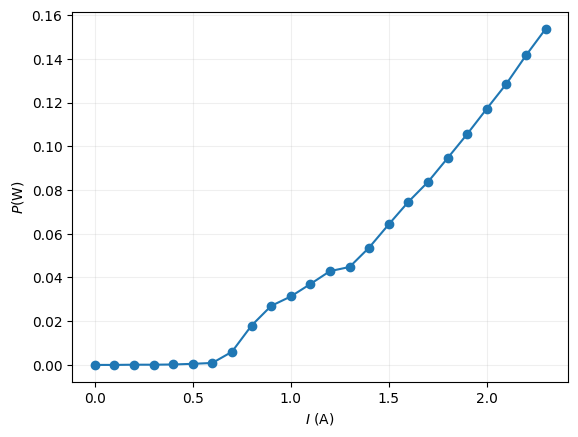

In [8]:
plt.figure(0, )
#plt.errorbar(a, pot, yerr = err_W, xerr = err_I, fmt = '.', capsize = 4)
plt.plot(a, pot, 'o-')
plt.xlabel(r'$I$ (A)'), plt.ylabel(r'$P$(W)')

plt.grid(alpha = 0.2)
plt.show()

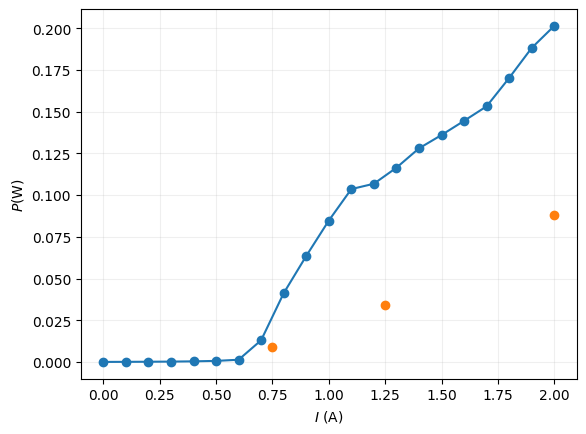

In [9]:
df = pd.read_csv('Mediciones potencia/medicion_completa_slim.csv')
I2, P2 = df['Corriente[A]'], df['Potencia[W]']

df2 = pd.read_csv('Mediciones potencia/Datos_potencia_810.csv')
Ib, Pb = df2['I (A)'], df2['P (W)']

plt.plot(I2, P2, 'o-')
plt.plot(Ib, Pb, 'o')
plt.xlabel(r'$I$ (A)'), plt.ylabel(r'$P$(W)')
plt.grid(alpha = 0.2)
plt.show()

# Mediciones espejo plano con luz apagada

In [10]:
pot_luz_apagada = pd.read_csv('Mediciones potencia/Datos_potencia_1064_luz_apagada.csv')
pot_luz_apagada_sin_lasear = pd.read_csv('Mediciones potencia/Datos_potencia_1064_luz_apagada_sin-lasear.csv')
pot_luz_apagada_rendija = pd.read_csv('Mediciones potencia/Datos_potencia_1064_luz_apagada_rendija.csv')

df = pd.DataFrame({'I(A)':pot_luz_apagada['I (A)'],
                   'Potencia (W)':pot_luz_apagada['P (W)'],
                   'Pototencia sin lasear (W)':pot_luz_apagada_sin_lasear['P (W)'],
                   'Potencia con rendija (W)':pot_luz_apagada_rendija['P (W)']})


df['Potencia sin ruido (W)'] = df['Potencia (W)'] - df['Pototencia sin lasear (W)']
display(df.head(11))


,I(A),Potencia (W),Pototencia sin lasear (W),Potencia con rendija (W),Potencia sin ruido (W)
0,0.0,0.0000,0.0000,0.0000,0.0000
1,0.1,0.0000,0.0000,0.0000,0.0000
2,0.2,0.0001,0.0001,0.0000,0.0000
3,0.3,0.0001,0.0001,0.0000,0.0000
4,0.4,0.0002,0.0002,0.0000,0.0000
5,0.5,0.0004,0.0005,0.0001,-0.0001
6,0.6,0.0010,0.0009,0.0002,0.0001
7,0.7,0.0070,0.0060,0.0010,0.0010
8,0.8,0.0228,0.0180,0.0038,0.0048
9,0.9,0.0300,0.0270,0.0047,0.0030


Parametro de 0 W:
m = 0.0013928571428571425
b = -0.0001607142857142857
---------------
Parametro de la lineal:
m = 0.1610484848484847
b = -0.17478969696969662
---------------
Punto de encuentro:
Potencia = 0.0016842009887933248
Corriente = 1.0937853252875156


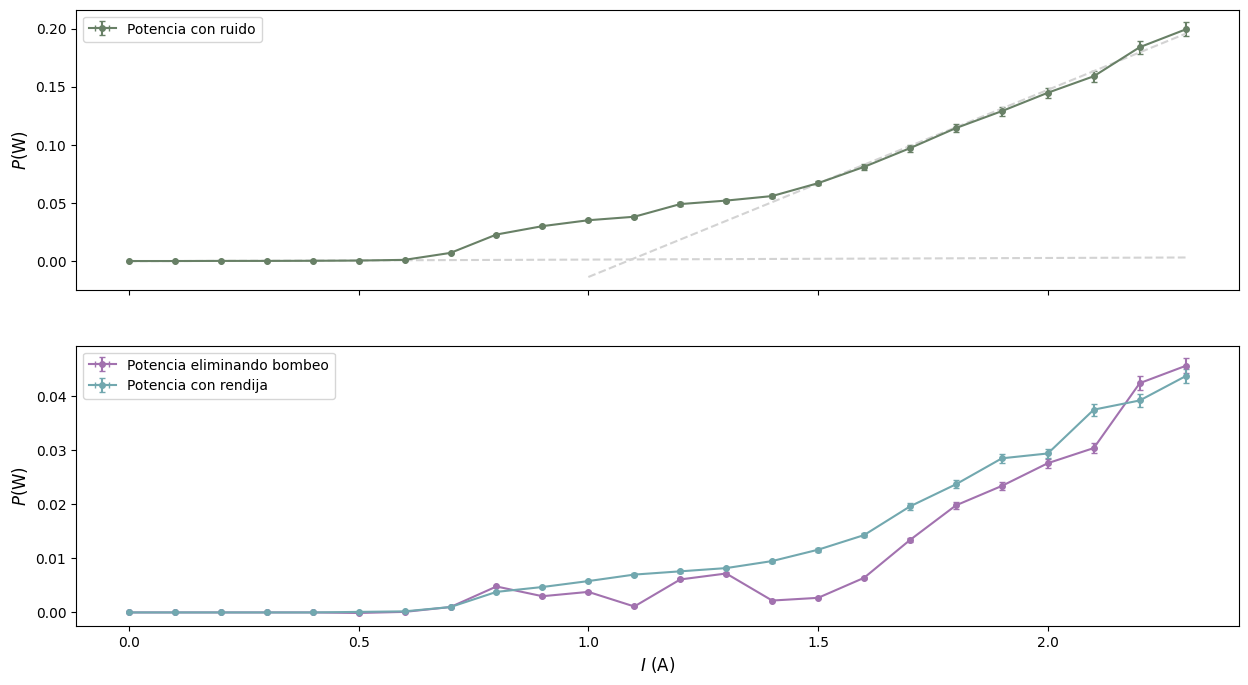

In [11]:
# ---Ajuste---
param1, pcov1 = np.polyfit(df['I(A)'][0:7],df['Potencia (W)'][0:7],1,cov = True)
mod1 = np.polyval(param1,df['I(A)'][0:7]) 
residuos = df['Potencia (W)'][0:7] - mod1

param2, pcov2 = np.polyfit(df['I(A)'][-10:],df['Potencia (W)'][-10:],1,cov = True)
mod2 = np.polyval(param2,df['I(A)'][-10:]) 
residuos = df['Potencia (W)'][-10:] - mod2

# ---Encuentro---
I = (param2[1]-param1[1])/(param1[0]-param2[0])
P = param1[0]*I-param1[1] 

# ---Grafico---
fig,axs = plt.subplots(2,1,sharex=True,figsize=(15,8))

axs[0].errorbar(df['I(A)'], df['Potencia (W)'],np.abs(df['Potencia (W)'])*0.03,0 ,fmt ='o-', label='Potencia con ruido',color = '#688066',capsize = 2,markersize = 4)
axs[0].plot(df['I(A)'],df['I(A)']*param1[0] + param1[1], '--', color = 'lightgrey')
axs[0].plot(df['I(A)'][-14:],df['I(A)'][-14:]*param2[0] + param2[1],'--',color = 'lightgrey')
#axs[0].scatter(I,P,color = 'rosybrown')
axs[0].set_ylabel(r'$P$(W)',fontsize=12)
axs[0].legend()

axs[1].errorbar(df['I(A)'], df['Potencia sin ruido (W)'],np.abs(df['Potencia sin ruido (W)'])*0.03,0, fmt ='o-', label='Potencia eliminando bombeo',color = '#a272af',capsize = 2,markersize = 4)
axs[1].errorbar(df['I(A)'], df['Potencia con rendija (W)'],np.abs(df['Potencia con rendija (W)'])*0.03,0, fmt = 'o-', label='Potencia con rendija',color = '#72a8af',capsize = 2,markersize = 4)
axs[1].set_xlabel(r'$I$ (A)',fontsize=12)
axs[1].set_ylabel(r'$P$(W)',fontsize=12)
axs[1].legend()

# ---Parametros del ajuste---
print('Parametro de 0 W:')
print(f'm = {param1[0]}')
print(f'b = {param1[1]}')
print('---------------')
print('Parametro de la lineal:')
print(f'm = {param2[0]}')
print(f'b = {param2[1]}')
print('---------------')
print('Punto de encuentro:')
print(f'Potencia = {P}')
print(f'Corriente = {I}')

fig.savefig('Figuras Informe/Analisis_potencia_cavidad_lineal.pdf', format = 'pdf')

# Analisis de modos

In [12]:
def read_csv(drive_d, file_d):
    root = drive_d + file_d
    csvs_files = os.listdir(root)

    d, I, name_csv = [], [], []
    for csv in csvs_files:
        df = pd.read_csv(root + f'/{csv}')
        d_i, I_i = df['Distance_(pixels)'], df['Gray_Value']

        d.append(np.array(d_i)), I.append(np.array(I_i)), name_csv.append(csv)

    return d, I, len(csvs_files), name_csv

## Selecciono los mejores modos

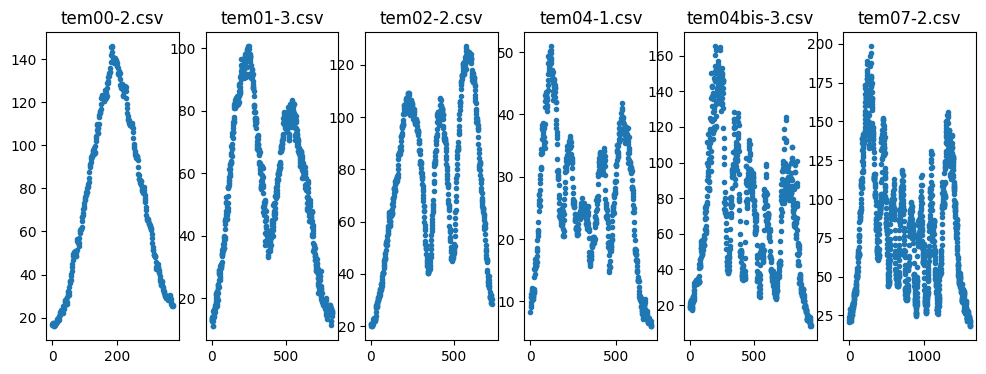

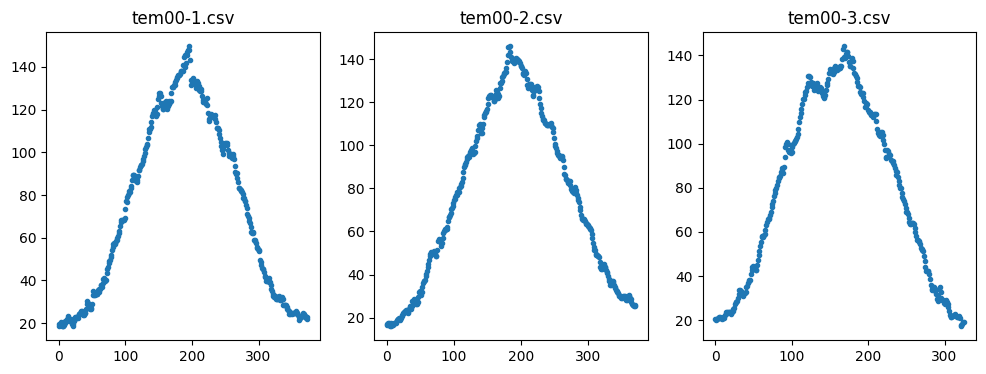

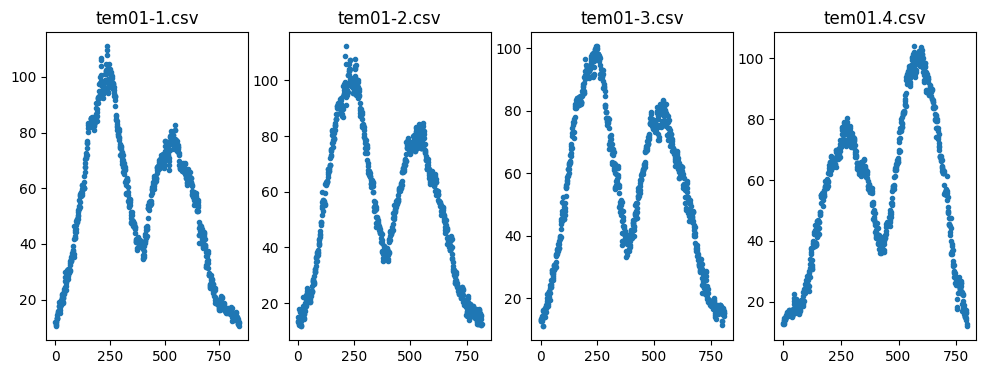

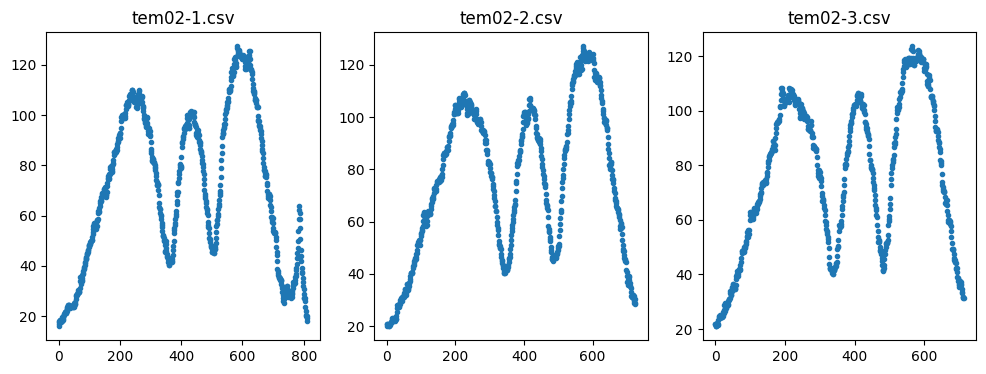

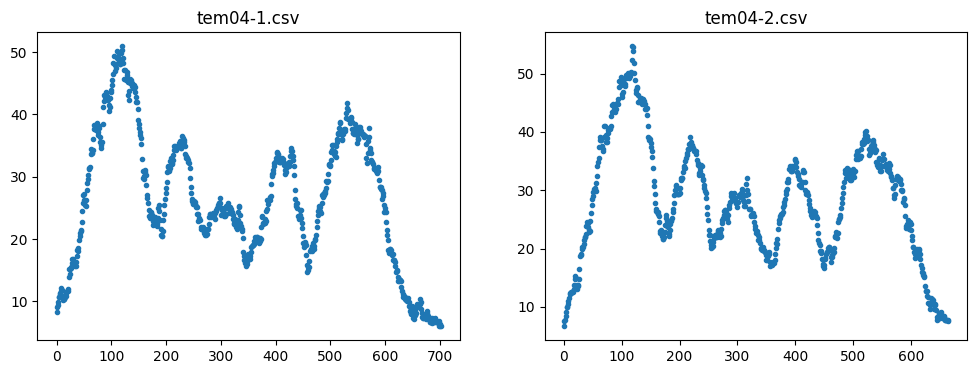

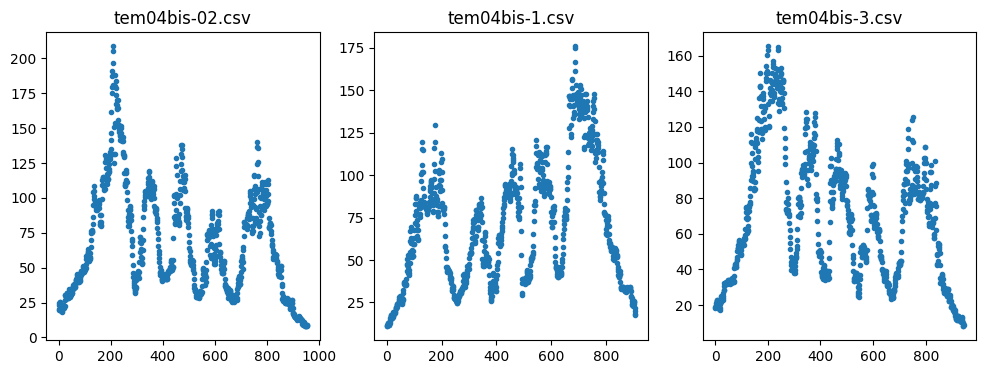

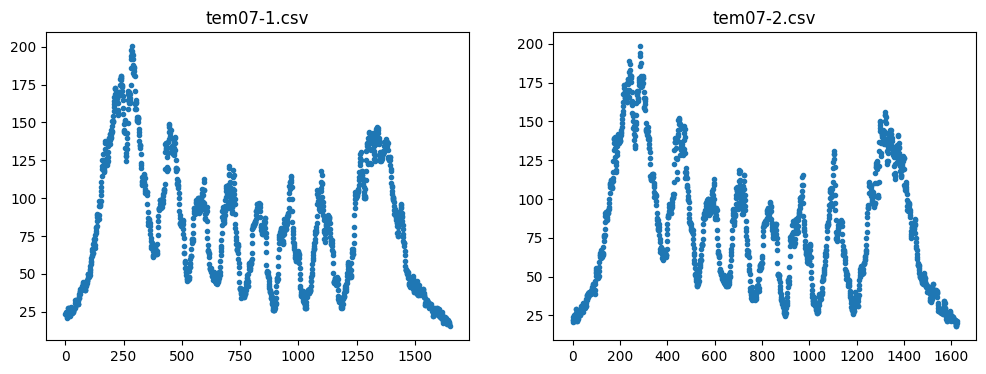

In [13]:
folders = os.listdir('Mediciones modos')

for file in folders:
    d_, I_, N, Nombre = read_csv('Mediciones modos/', file)

    fig, axs = plt.subplots(1, N, figsize = (12, 4))
    for k, (D, I, nombre) in enumerate(zip(d_, I_, Nombre)):
        axs[k].plot(D, I, '.')
        axs[k].set_title(nombre)

    plt.show()

## Análisis de archivos ya filtrados

In [ ]:
def U_pq(hermite_int, r, w, a):
    p, q = hermite_int
    x, y = r
    rho2 = x**2 + y**2
    
    Hp = hermite(p)
    Hq = hermite(q)
    
    return a * np.abs(Hp(np.sqrt(2) * x / w) * Hq(np.sqrt(2) * y / w) * np.exp(-rho2/w**2))**2

def I_p(x, x0, w, p):
    xi = (x - x0) * np.sqrt(2) / w
    Hx = eval_hermite(int(p), xi)
    
    return (Hx**2) * np.exp(-2 * ((x - x0) / w)**2)


### Análisis de picos e intensidades relativas

In [21]:
'hola'.upper()

'HOLA'

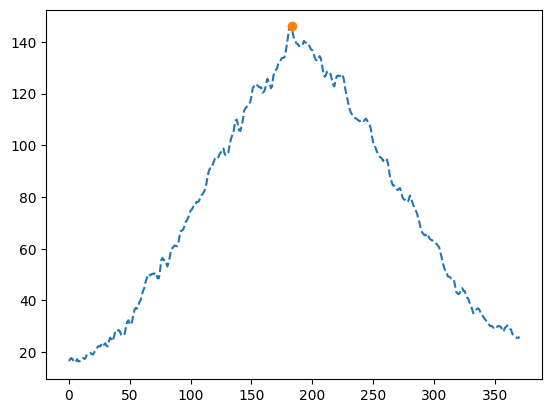

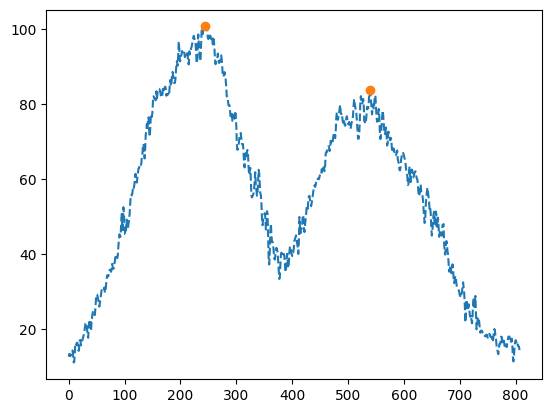

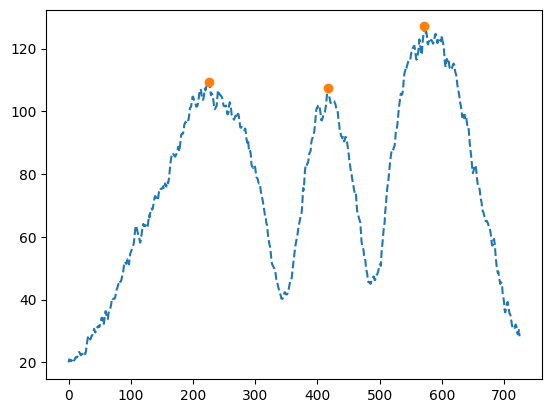

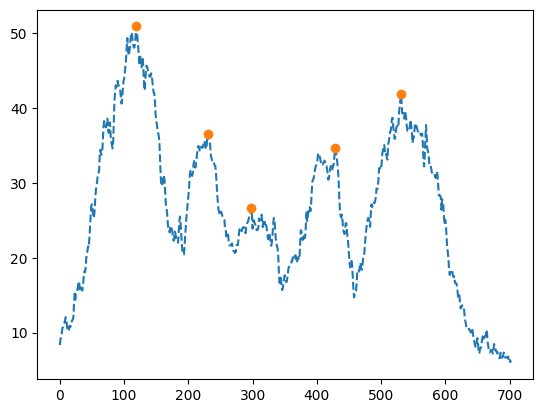

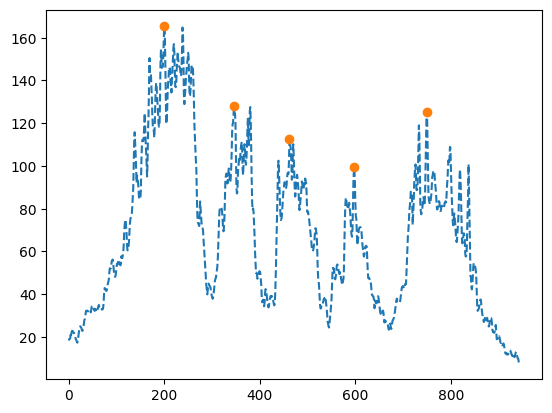

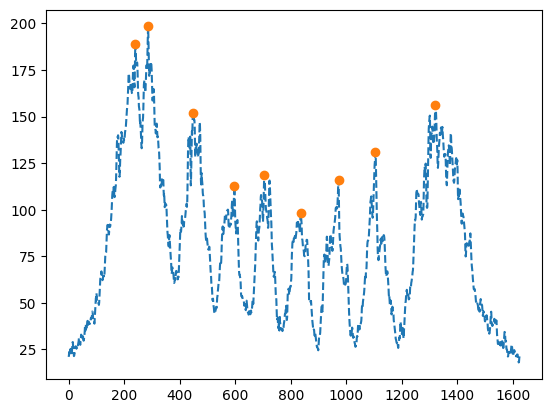

In [121]:
path_filtrados = 'Mediciones modos/filtrados'
csv_files = os.listdir(path_filtrados)

I_rel, modo, I_picos, X_picos = [], [], [], []
for csv in csv_files:
    df = pd.read_csv(path_filtrados + f'/{csv}')
    x, I = df['Distance_(pixels)'], df['Gray_Value']
    
    peaks, _ = find_peaks(I, distance = 20, width = 20)
    x_peaks, I_peaks = x[peaks], I[peaks]
    I_picos.append(I[peaks].astype(float).to_numpy())
    X_picos.append(x[peaks].astype(float).to_numpy())
    
    try:
        I_rel.append(np.diff(I_peaks))
    except:
        I_rel.append(I_peaks)
    modo.append(float(csv[3:5]))
    
    plt.figure()
    plt.plot(x, I, '--')
    plt.plot(x_peaks, I_peaks, 'o')
    plt.show()
    

### Ajuste del modo TEM00

Los resultados del ajuste son: 
 [132.4868923  192.08281235  86.54222565]


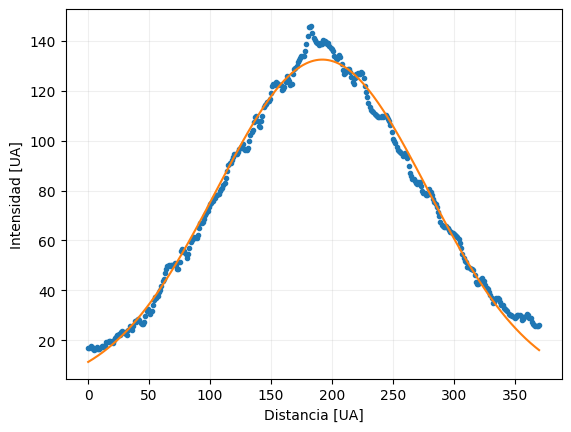

In [16]:
df = pd.read_csv('Mediciones modos/filtrados/tem00-2.csv')
X, I = df['Distance_(pixels)'], df['Gray_Value']

gaussian_function = lambda x, amplitude, mean, std_dev: amplitude * np.exp(-0.5 * ((x - mean) / std_dev)**2)

popt, pcov = curve_fit(gaussian_function, X, I)

fig, axs = plt.subplots()

axs.plot(X, I, '.')
axs.plot(X, gaussian_function(X, *popt))

axs.set(xlabel = 'Distancia [UA]', ylabel = 'Intensidad [UA]')

axs.grid(alpha = 0.2)

print('Los resultados del ajuste son: \n', popt)


### Ajuste de los modos p

In [136]:
def p0s(x_data, y_data, p, ñ = 1.5):
    
    """
    Esta función asume que existen
    dos listas llamadas:
    * I_picos
    * X_picos
    """
    
    i_picos = I_picos[p]
    x_picos = X_picos[p]
    
    w_p0 = (x_picos[-1] - x_picos[0]) / ñ # -> 1.5 es arbitrario
    A_p0 = np.max(y_data)
    x0_p0 = np.mean(x_data)
    
    p0 = [A_p0, x0_p0, w_p0]
    return p0

0
[132.48690998 192.08280392 173.0844038 ]


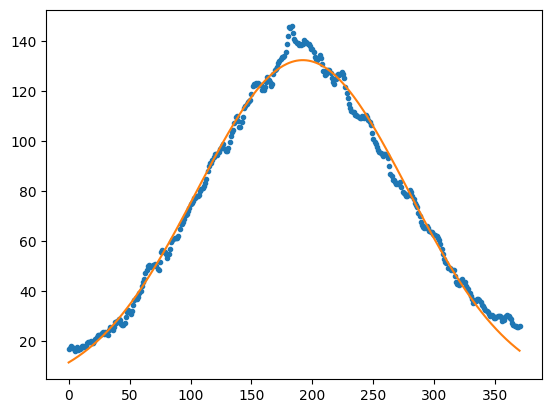

1
[ 67.16898628 382.70537159 228.18055056]


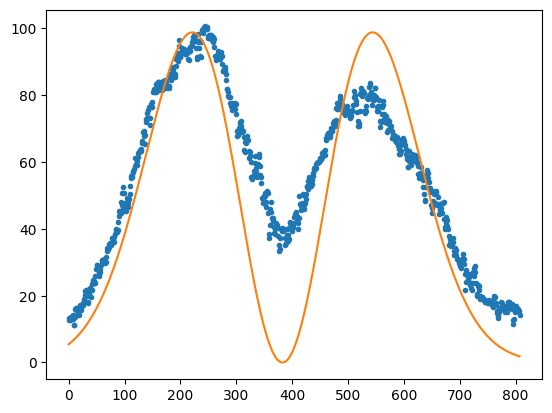

2
[ 26.54361398 408.35816368 163.4618948 ]


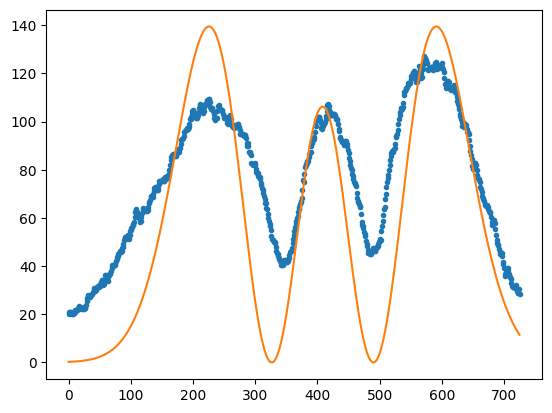

4
[2.36758280e-01 3.21995756e+02 1.24176556e+02]


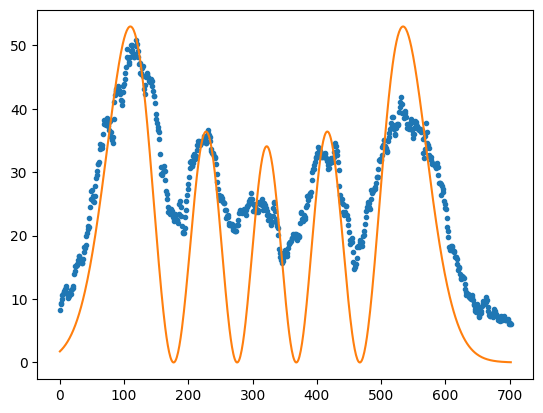

4
[  0.66120862 481.49496323 161.03723061]


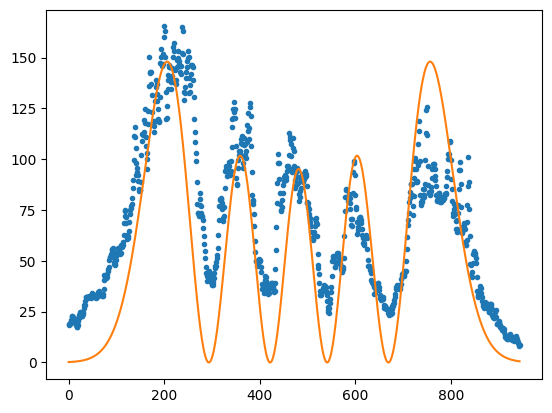

7
[4.48087432e-04 8.77299336e+02 2.61526787e+02]


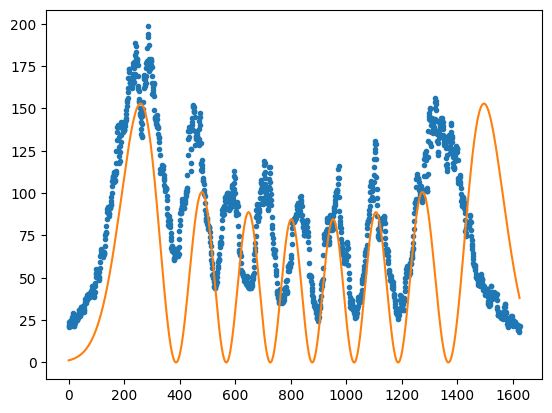

In [141]:
modos_filtrados = os.listdir(path_filtrados)

for modo in modos_filtrados:
    p_number = int(modo[4])
    print(p_number)
    I_ajuste = lambda x, a, x0, w: a * I_p(x, x0, w, p = p_number)
    
    df = pd.read_csv(path_filtrados + f'/{modo}')
    X, I, = df['Distance_(pixels)'].astype(float).to_numpy(), df['Gray_Value'].astype(float).to_numpy()
    
    #p0 = p0s(X, I, p_number)
    popt, pcov = curve_fit(I_ajuste, X, I, p0 = [max(I), np.mean(X), 150])
    print(popt)
    
    plt.figure()
    plt.plot(X, I, '.')
    plt.plot(X, I_ajuste(X, *popt))
    
    plt.show()
    

### Ajuste por suma de modos

[ 8.95013932e+00  8.22265376e+01 -6.70949853e-01 -1.90315306e-01
  8.34080210e-02  2.64109832e+02]


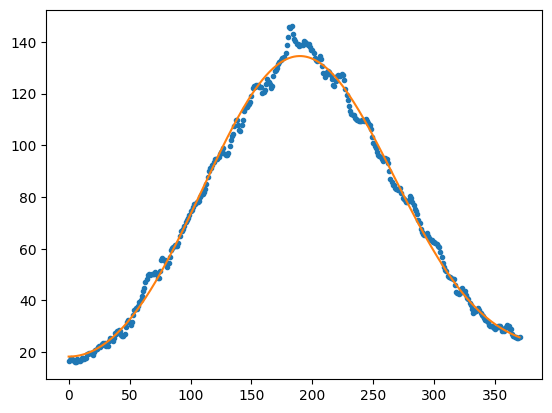

[-66.87397756 -39.85754168  -8.06948571  -5.30677672   0.77651763
   1.23388682]


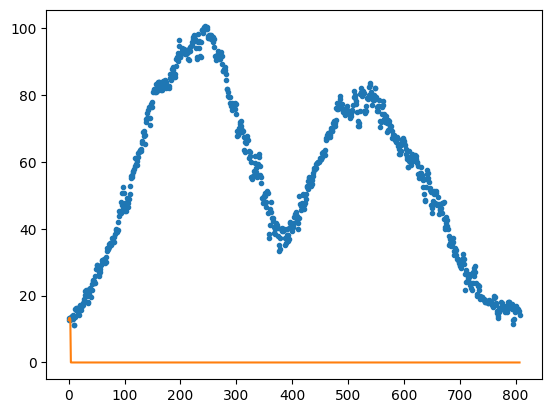

[-7.72314846e+00  3.86254864e+01  8.35948963e-01  2.29485765e+00
  1.85413385e-01  3.66830782e+02]


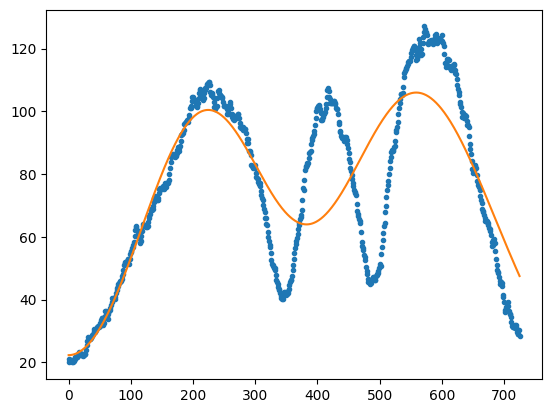

[-61.39498195 -34.76270875  -5.42378161  -4.55880679   0.63488437
   1.23037879]


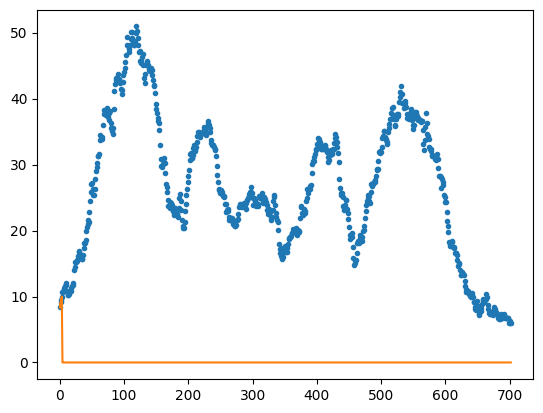

[ 3.59637310e+01  4.60555384e+01 -2.36288167e+00  2.20580389e+00
  3.94230346e-05  4.99506765e+02]


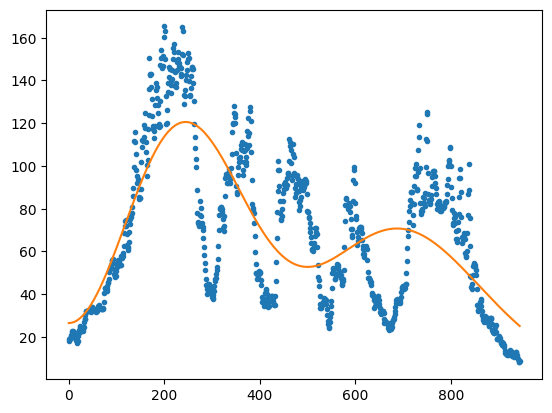

[ 5.96936239e+01  2.66030212e+01  8.68298292e-01  2.73486480e+00
 -7.21735358e-05  8.82899877e+02]


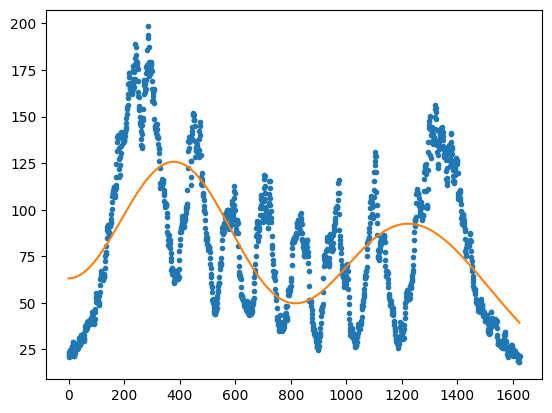

In [ ]:
modos_filtrados = os.listdir(path_filtrados)

I_ajuste = lambda x, a0, a1, a2, a3, a4, w: a0*I_p(x, a, w, p = 0) + a1*I_p(x, a, w, p = 1) + a2*I_p(x, a, w, p = 2) + a3*I_p(x, a, w, p = 3) + a4*I_p(x, a, w, p = 4)

for modo in modos_filtrados:
    p_number = float(modo[-5])
    
    df = pd.read_csv(path_filtrados + f'/{modo}')
    X, I, = df['Distance_(pixels)'].astype(float).to_numpy(), df['Gray_Value'].astype(float).to_numpy()
    
    popt, pcov = curve_fit(I_ajuste, X, I, maxfev = 10000)
    print(popt)
    
    plt.figure()
    plt.plot(X, I, '.')
    plt.plot(X, I_ajuste(X, *popt))
    
    plt.show()

In [133]:
def p0s(x_data, y_data, p, ñ = 1.5):
    
    """
    Esta función asume que existen
    dos listas llamadas:
    * I_picos
    * X_picos
    """
    
    i_picos = I_picos[p]
    x_picos = X_picos[p]
    
    w_p0 = (x_picos[-1] - x_picos[0]) / ñ # -> 1.5 es arbitrario
    A_p0 = np.max(y_data)
    x0_p0 = np.mean(x_data)
    
    p0 = [A_p0, x0_p0, w_p0]
    return p0
    

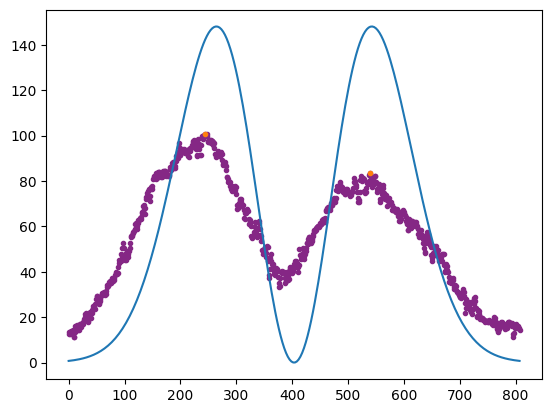

In [ ]:
I = lambda x, a, x0, w: a * I_p(x, x0, w, p = 1)

i_picos = I_picos[1]
x_picos = X_picos[1]

modo = pd.read_csv(f'Mediciones modos/filtrados/tem01-3.csv')
xi, ii = modo['Distance_(pixels)'], modo['Gray_Value']

mitad = max(ii) / 2
puntos_interp = np.interp()


plt.plot(xi, ii, '.',c = '#852785')

x = np.linspace(min(xi), max(xi), 252)
p0 = p0s(xi, ii, 1)
plt.plot(x, I(x, *p0))

plt.plot(x_picos, i_picos, '.')
plt.show()

# Graficos de modos para la presentacion 

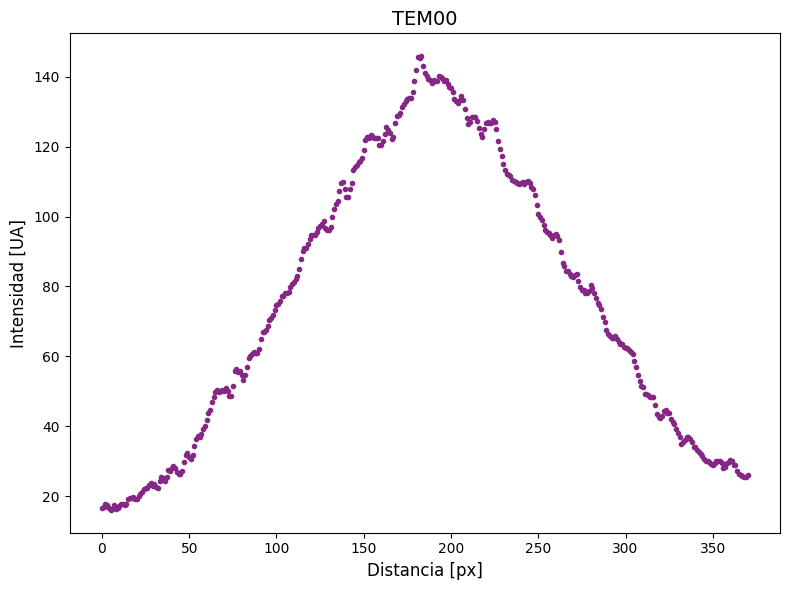

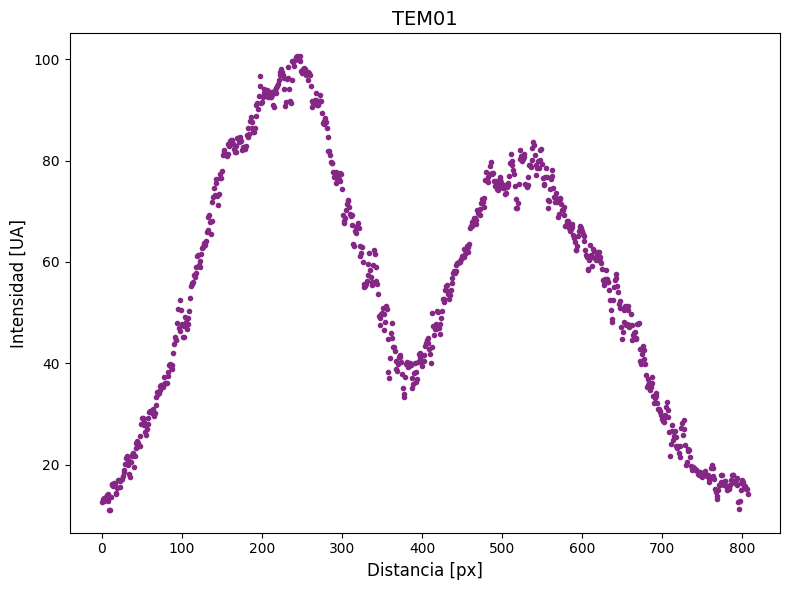

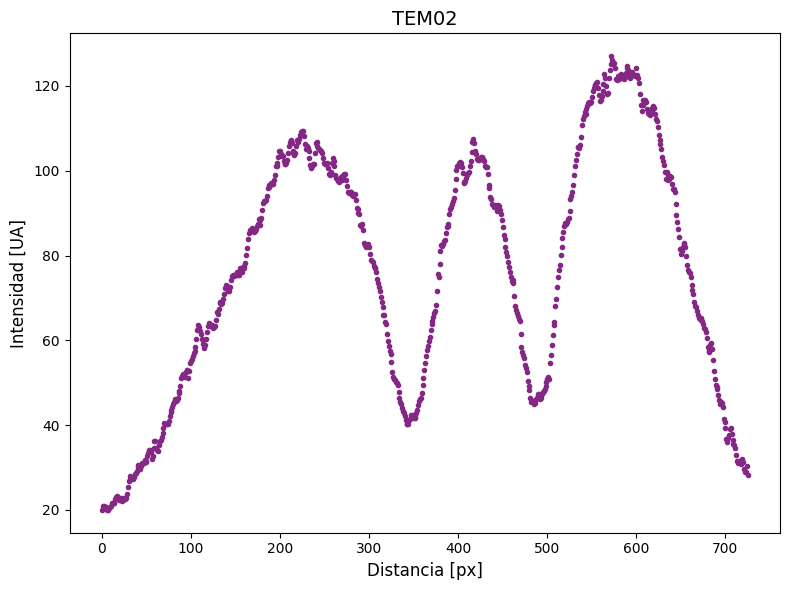

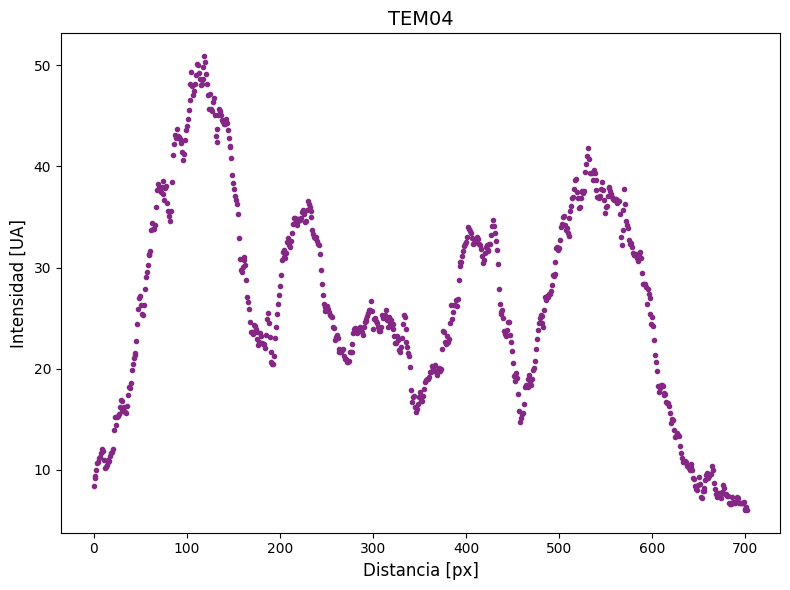

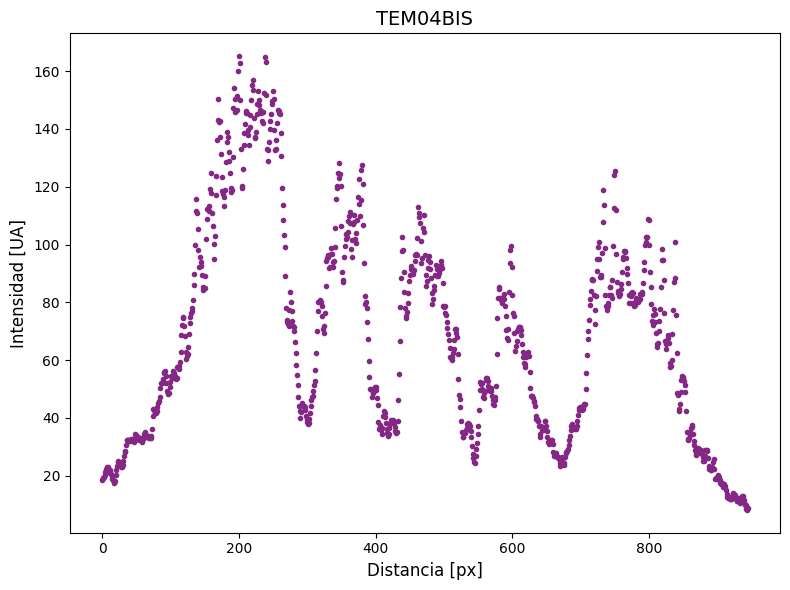

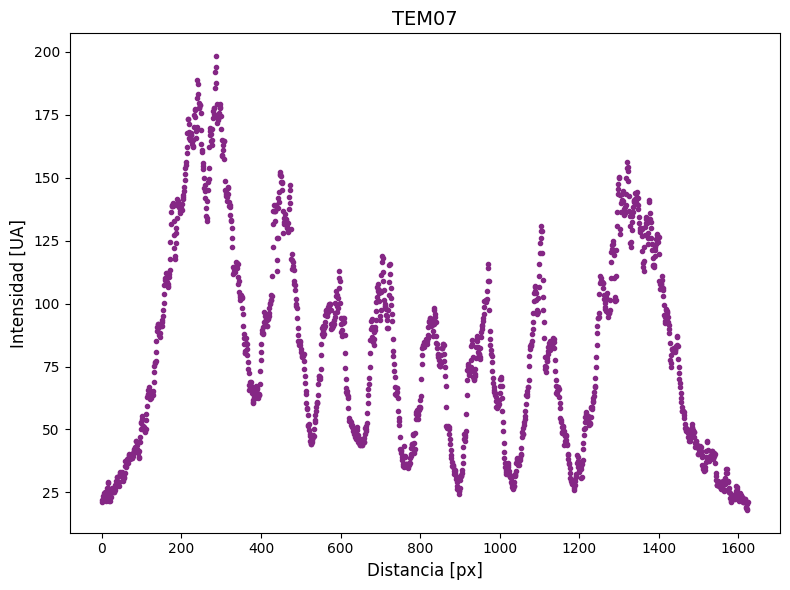

In [22]:
archivos_filtrados = os.listdir('Mediciones modos/filtrados')

for archivo in archivos_filtrados:
    modo = pd.read_csv(f'Mediciones modos/filtrados/{archivo}')

    plt.figure(figsize = (8,6))
    plt.plot(modo['Distance_(pixels)'], modo['Gray_Value'], '.',c = '#852785')
    plt.xlabel('Distancia [px]',fontsize = 12)
    plt.ylabel('Intensidad [UA]',fontsize = 12)
    plt.title(archivo[:-6].upper(),fontsize = 14)
    plt.tight_layout()
    
    plt.savefig(f'Figuras Informe/{archivo[:-4]}.pdf')